
# Contexto

A COVID-19 infectou mais de 10.000 pessoas na Coreia do Sul. O KCDC (Centro de Controle e Prevenção de Doenças da Coreia) anuncia as informações sobre a COVID-19 de forma transparente.


Este projeto de análise de dados tem como objetivo fornecer uma visão detalhada e precisa da evolução da COVID-19 na Coreia do Sul. Utilizando dados estruturados provenientes do KCDC e de governos locais.
# Autoria: @pedroblaschi   -  [linkedin](https://www.linkedin.com/in/pedro-blaschi-a3b5b22a9/)  -  [github](https://github.com/blaschis/blaschis) <p>




# Libs

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import datetime
import seaborn as sns

warnings.filterwarnings('ignore')

# Lendo Dataset

In [67]:
df = [pd.read_csv(file) for file in ['Case.csv', 'PatientInfo.csv', 'Policy.csv', 'Region.csv', 'SearchTrend.csv', 'SeoulFloating.csv', 'Time.csv', 'TimeAge.csv', 'TimeGender.csv', 'TimeProvince.csv', 'Weather.csv']]


In [44]:
arquivos_csv = ['Case.csv', 'PatientInfo.csv', 'Policy.csv', 'Region.csv', 'SearchTrend.csv',
                'SeoulFloating.csv', 'Time.csv', 'TimeAge.csv', 'TimeGender.csv',
                'TimeProvince.csv', 'Weather.csv']

dfs = [pd.read_csv(arquivo) for arquivo in arquivos_csv]

for df in dfs:
    print(df.head())

    case_id province          city  group               infection_case  \
0   1000001    Seoul    Yongsan-gu   True                Itaewon Clubs   
1   1000002    Seoul     Gwanak-gu   True                      Richway   
2   1000003    Seoul       Guro-gu   True          Guro-gu Call Center   
3   1000004    Seoul  Yangcheon-gu   True  Yangcheon Table Tennis Club   
4   1000005    Seoul     Dobong-gu   True              Day Care Center   

   confirmed   latitude   longitude  
0        139  37.538621  126.992652  
1        119   37.48208  126.901384  
2         95  37.508163  126.884387  
3         43  37.546061  126.874209  
4         43  37.679422  127.044374  
   patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s 

# Traduzindo colunas

In [37]:
#traduzindo colunas

traducoes = {
    'case_id': 'id_caso',
    'province': 'provincia',
    'city': 'cidade',
    'group': 'grupo',
    'infection_case': 'caso_infeccao',
    'confirmed': 'confirmados',
    'latitude': 'latitude',
    'longitude': 'longitude',
    'patient_id': 'id_paciente',
    'sex': 'sexo',
    'age': 'idade',
    'country': 'pais',
    'infected_by': 'infectado_por',
    'contact_number': 'numero_contato',
    'symptom_onset_date': 'data_inicio_sintomas',
    'confirmed_date': 'data_confirmacao',
    'released_date': 'data_alta',
    'deceased_date': 'data_falecimento',
    'state': 'estado',
    'policy_id': 'id_politica',
    'type': 'tipo',
    'gov_policy': 'politica_governo',
    'detail': 'detalhes',
    'start_date': 'data_inicio',
    'end_date': 'data_fim',
    'code': 'codigo',
    'test': 'teste',
    'negative': 'negativo',
    'released': 'liberados',
    'deceased': 'falecidos',
    'avg_temp': 'temp_media',
    'min_temp': 'temp_min',
    'max_temp': 'temp_max',
    'precipitation': 'precipitacao',
    'max_wind_speed': 'velocidade_max_vento',
    'most_wind_direction': 'direcao_vento_mais_forte',
    'avg_relative_humidity': 'umidade_relativa_media',
    'hour': 'hora',
    'birth_year': 'ano_nascimento',
    'fp_num': 'numero_fp',
    'time': 'tempo',
    'flu': 'gripe',
    'cold': 'resfriado',
    'pneumonia': 'pneumonia',
    'coronavirus': 'coronavirus',
    'confirmed': 'confirmados',
    'deceased': 'falecidos'
}

for df in dfs:
  df.rename(columns=traducoes, inplace=True)

# Limpeza

In [38]:
#dados ausentes
for df in dfs:
    df.fillna({'latitude': 0, 'longitude': 0}, inplace=True)

In [39]:
#mensagem dados ausentes
for df in dfs:
    if 'sexo' in df.columns:
        df['sexo'].fillna('Não consta', inplace=True)

In [40]:
#drop colunas inuteis
for df in dfs:
    if 'idade' in df.columns and 'sexo' in df.columns:
        df.dropna(subset=['idade', 'sexo'], inplace=True)

In [41]:
#padronizando formato de datas
for df in dfs:
    if 'data_confirmacao' in df.columns:
        df['data_confirmacao'] = pd.to_datetime(df['data_confirmacao'], errors='coerce')

In [42]:
#removendo duplicatas
for df in dfs:
    df.drop_duplicates(inplace=True)

In [43]:
df.nunique()

,0
codigo,16
provincia,17
date,1642
temp_media,464
temp_min,469
temp_max,487
precipitacao,538
velocidade_max_vento,167
direcao_vento_mais_forte,16
umidade_relativa_media,669


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   26271 non-null  int64  
 1   province               26271 non-null  object 
 2   date                   26271 non-null  object 
 3   avg_temp               26256 non-null  float64
 4   min_temp               26266 non-null  float64
 5   max_temp               26268 non-null  float64
 6   precipitation          26271 non-null  float64
 7   max_wind_speed         26262 non-null  float64
 8   most_wind_direction    26242 non-null  float64
 9   avg_relative_humidity  26251 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.0+ MB


# Distribuição de casos por faixa etária e gênero

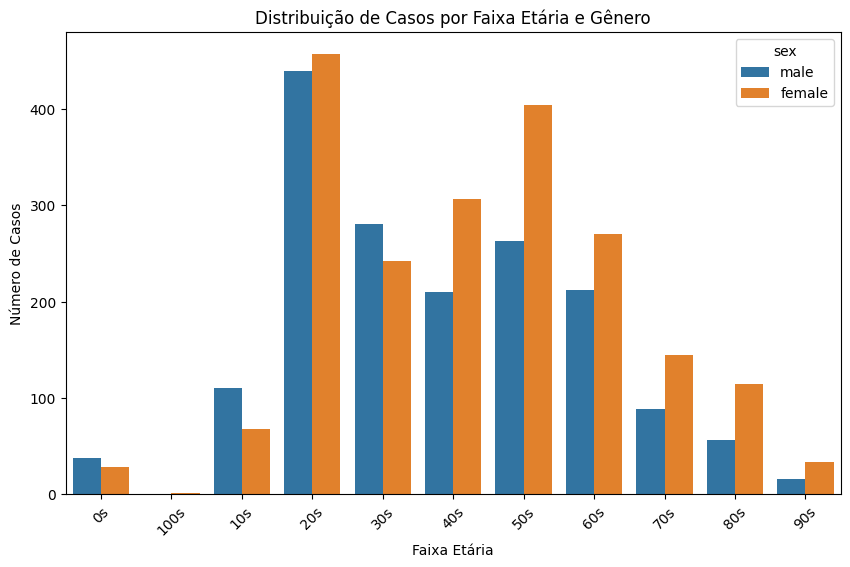

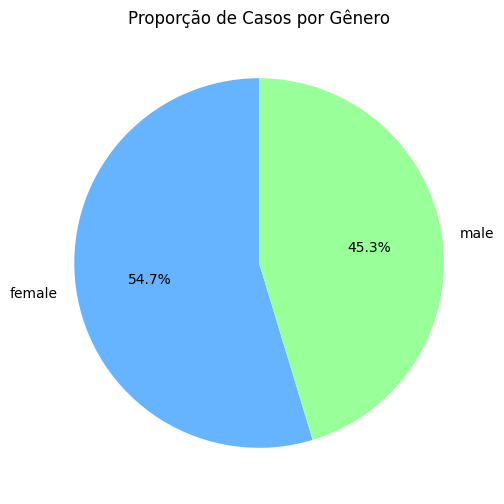

In [68]:
df_pacientes = dfs[1]

if 'age' in df_pacientes.columns and 'sex' in df_pacientes.columns:
    df_pacientes = df_pacientes.dropna(subset=['age', 'sex'])

    plt.figure(figsize=(10,6))
    sns.countplot(data=df_pacientes, x='age', hue='sex', order=sorted(df_pacientes['age'].unique()))
    plt.title('Distribuição de Casos por Faixa Etária e Gênero')
    plt.xlabel('Faixa Etária')
    plt.ylabel('Número de Casos')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(6,6))
    df_pacientes['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
    plt.title('Proporção de Casos por Gênero')
    plt.ylabel('')
    plt.show()

# Casos confirmados por região

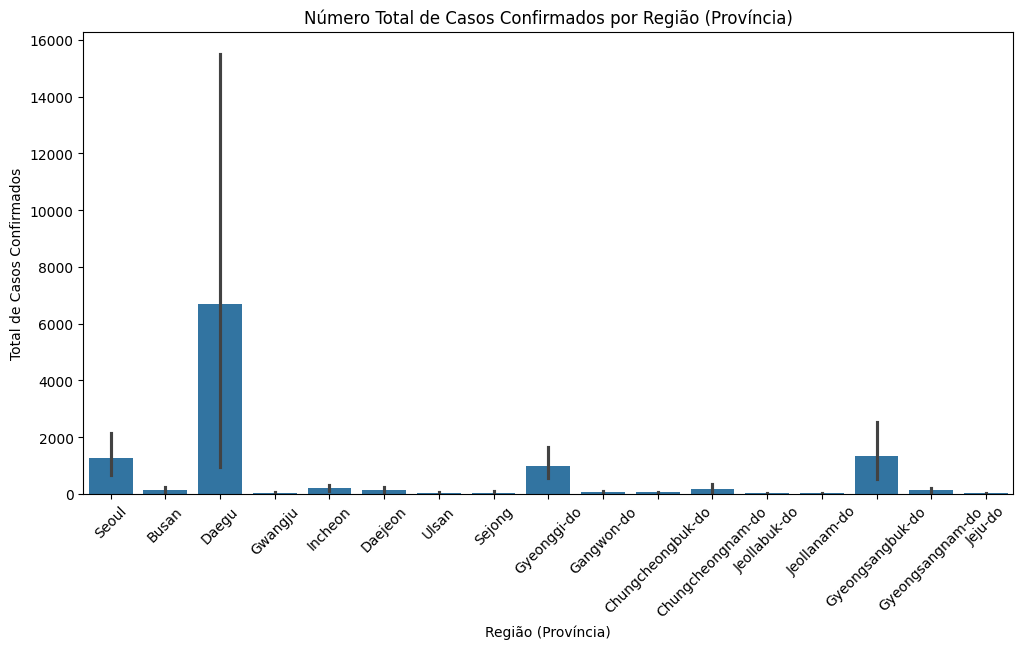

Coluna 'deceased' não encontrada no dataframe.


In [58]:
df_casos = dfs[0]


if 'province' in df_casos.columns and 'confirmed' in df_casos.columns:

    df_casos = df_casos.dropna(subset=['province', 'confirmed'])

    plt.figure(figsize=(12,6))
    sns.barplot(data=df_casos, x='province', y='confirmed', estimator=sum)
    plt.title('Número Total de Casos Confirmados por Região (Província)')
    plt.xlabel('Região (Província)')
    plt.ylabel('Total de Casos Confirmados')
    plt.xticks(rotation=45)
    plt.show()

    if 'deceased' in df_casos.columns:
        df_casos['taxa_mortalidade'] = (df_casos['deceased'] / df_casos['confirmed']) * 100

        plt.figure(figsize=(12,6))
        sns.barplot(data=df_casos, x='province', y='taxa_mortalidade', estimator='mean')
        plt.title('Taxa de Mortalidade por Região (Província)')
        plt.xlabel('Região (Província)')
        plt.ylabel('Taxa de Mortalidade (%)')
        plt.xticks(rotation=45)
        plt.show()

# Casos confirmados, recuperados e falecidos ao longo do tempo

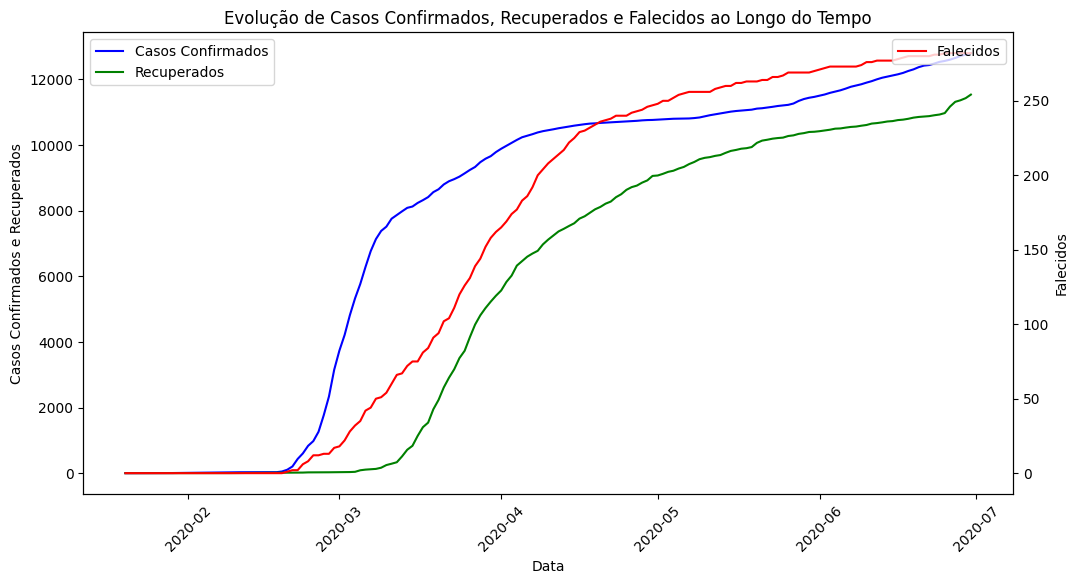

In [66]:
df_tempo = dfs[6]

if 'date' in df_tempo.columns and 'confirmed' in df_tempo.columns:
    df_tempo['date'] = pd.to_datetime(df_tempo['date'], errors='coerce')

    fig, ax1 = plt.subplots(figsize=(12,6))

    sns.lineplot(data=df_tempo, x='date', y='confirmed', label='Casos Confirmados', color='blue', ax=ax1)
    sns.lineplot(data=df_tempo, x='date', y='released', label='Recuperados', color='green', ax=ax1)
    ax1.set_ylabel('Casos Confirmados e Recuperados')
    ax1.set_xlabel('Data')
    plt.xticks(rotation=45)

    ax2 = ax1.twinx()
    sns.lineplot(data=df_tempo, x='date', y='deceased', label='Falecidos', color='red', ax=ax2)
    ax2.set_ylabel('Falecidos')

    plt.title('Evolução de Casos Confirmados, Recuperados e Falecidos ao Longo do Tempo')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()